# Deutsz josza algorithm. 

Given a quantum oracle either balanced or constant, design a circuit to return 0 if constant else balanced

In [157]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np

#### constant function 

In [158]:
N = 10

QREG = QuantumRegister(N+1)
CREG = ClassicalRegister(N)

QC = QuantumCircuit(QREG, CREG)

QC.x(N)
QC.barrier()

for i in range(N+1):
    QC.h(i)

QC.barrier()

oracleType = "constant"
# oracleType = "balanced"
oracleValue = 1


if oracleType == "constant": 
    if oracleValue == 1:
        for i in range(N):
            QC.cx(i,N)
        for i in range(N):
            QC.cx(i,N)            
    else:
        QC.id(QREG[N])
else: 
    for i in range(N):
        a = np.random.randint(1,2**N)
        if (a & (1 << i)):
            QC.cx(QREG[i], QREG[N])

QC.barrier()

for i in range(N+1):
    QC.h(i)

In [159]:
state = Statevector(QC)
state.draw(output="latex", )


<IPython.core.display.Latex object>

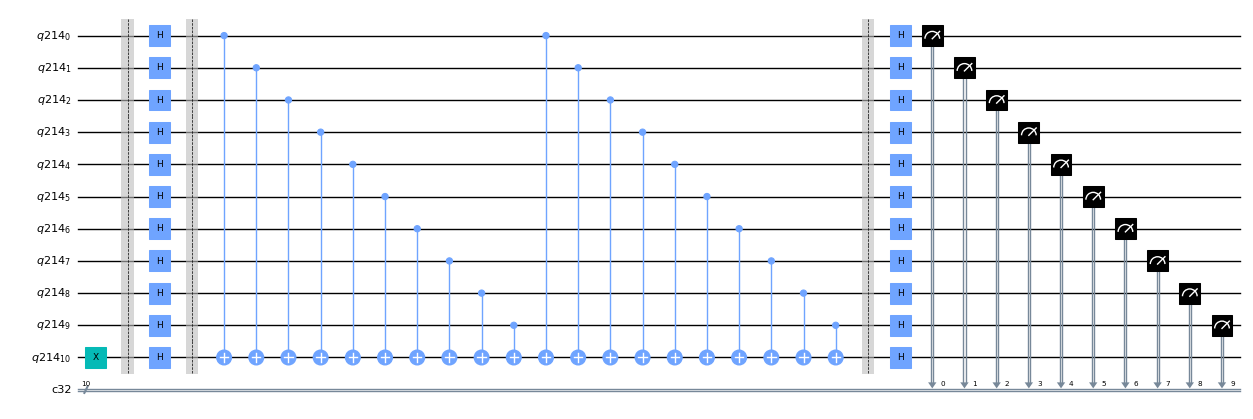

In [160]:
QC.measure(range(N), range(N))
QC.draw(output="mpl", scale=0.5, fold=100)

Statevector([ 4.6403853e-17+6.123234e-17j,  0.0000000e+00+0.000000e+00j,
              0.0000000e+00+0.000000e+00j, ...,
              0.0000000e+00+0.000000e+00j,  0.0000000e+00+0.000000e+00j,
             -0.0000000e+00+0.000000e+00j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


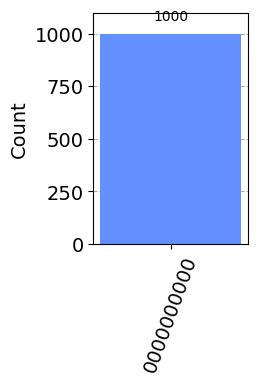

In [161]:
backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

QC.save_statevector()   # Tell simulator to save statevector
result = backend.run(transpile(QC, backend), shots=1000).result()
out_state = result.get_statevector()
print(out_state) # Display the output state vector
plot_histogram(result.get_counts(), figsize=(2,3))